In [ ]:
#default_exp datablock

# DataBlock

> process timeseries datasets with DataBloc

In [ ]:
#export
from torchtools.data import *
from torchtools.datasets import *

In [ ]:
from torchtools.augmentations import *

In [ ]:
from fastai2.data.all import *

In [ ]:
import pandas as pd
import numpy as np
from functools import partial

In [ ]:
# from fastai2.vision.all import *

In [ ]:
_verbose=True

### Until now 

In [ ]:
df_main = pd.read_csv('./data/custom/bi_sample_anon.csv', nrows=200000)

In [ ]:
## simple config
x_cols = [[f'x{i}_{j}' for j in range(10)] for i in range(6)]
dep = 'y0'
n_train = 8000

In [ ]:
#int
def get_discrete_config():
    '''get a simple column configuration for development'''
    x_cols_cont = [[f'x{i}_{j}' for j in range(10)] for i in [0,1,3,4]] 
    x_cols_discrete = [[f'x{i}_{j}' for j in range(10)] for i in [2,5]]
    dep = 'y0'
    n_train = 8000
    
    return x_cols_cont, x_cols_discrete, dep, n_train

In [ ]:
#int
x_cont, x_dis, dep, n_train = get_discrete_config()

In [ ]:
#int
df_main[x_dis[0]] ## still missing values 

,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x2_7,x2_8,x2_9
0,0.0,1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,1.0
1,0.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0
2,-1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-2.0,0.0
3,-2.0,-1.0,2.0,2.0,0.0,3.0,0.0,-2.0,-1.0,0.0
4,-1.0,-2.0,2.0,0.0,-2.0,-1.0,1.0,-2.0,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,1.0,1.0,-1.0,-3.0,-4.0,0.0,-4.0,1.0
199996,-1.0,0.0,4.0,1.0,-1.0,0.0,1.0,4.0,-1.0,2.0
199997,-2.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-3.0,-2.0
199998,0.0,1.0,-1.0,0.0,0.0,4.0,0.0,0.0,-1.0,0.0


items is a list of (x,y) tuples  
methods called when passing items to DataBlock:
- DataBlock.datasets(items, ....)
- Dataset(items, ...)
- TfmdList(items, ...)
- L(items, ...)
- CollBase.__init__(items, ...)



`df_to_items` and `df_to_items_discrete`:
- fill in the nans
- zip together `(x,y)` resp. `(x_cont, x_dis, y)`
- return n_train for convenience, needed to split up data sometimes, e.g. for the ucr data
- list of tuples

In [ ]:
#int
items, n_train = df_to_items_discrete(df_main, (x_cont, x_dis), dep, n_train)

(200000, 4, 10) (200000, 2, 10)


In [ ]:
len(items), len(items[0]), items[0][0].shape, items[0][1].shape, items[0][2], type(items)

(200000, 3, (4, 10), (2, 10), -56.49717514124313, list)

In [ ]:
df_to_items??

Not ideal that some function names are used in different steps in similar, but not identical ways

In [ ]:
def items_to_list(items):
    '''convert list of tuples to list of lists'''
    return list(map(list, items))

In [ ]:
items_l = items_to_list(items)
assert isinstance(items_l[0], list)

In [ ]:
X[0]

[array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
          -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
          -30.674847 ,  100.       ],
        [ 100.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ],
        [   0.       ,    1.       ,   -1.       ,   -2.       ,
           -1.       ,    0.       ,    0.       ,    0.       ,
           -2.       ,    1.       ],
        [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
         -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
         -100.       ,  -94.33962  ],
        [   0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ],
        [   0.       ,    1.       ,    0.       ,   -1.       ,
           -1.       ,   -1.       ,   -1.       ,    0.       ,
           -1.       ,   -2.  

In [ ]:
items[0]

(array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
          -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
          -30.674847 ,  100.       ],
        [ 100.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ],
        [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
         -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
         -100.       ,  -94.33962  ],
        [   0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ]], dtype=float32),
 array([[ 0,  1, -1, -2, -1,  0,  0,  0, -2,  1],
        [ 0,  1,  0, -1, -1, -1, -1,  0, -1, -2]]),
 -56.49717514124313)

In [ ]:
def get_x(x):
    pv(f'get_x item {x}', verbose=_verbose)
    return x[0]
def get_y(x):
    pv(f'get_y item {x}', verbose=_verbose)
    return x[1]

In [ ]:
_verbose=False

In [ ]:
len(items)

200000

In [ ]:
items[0]

[array([[  -7.84313725,  100.        ,   -6.4977258 ,  -24.50980392,
          -33.22259136,  -42.73504274,  -55.24861878,  -56.49717514,
          -30.67484663,  100.        ],
        [ 100.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    1.        ,   -1.        ,   -2.        ,
           -1.        ,    0.        ,    0.        ,    0.        ,
           -2.        ,    1.        ],
        [ -17.30103806,  100.        ,  -30.67484663,  -54.94505495,
         -227.27272727,  -27.8551532 , -400.        , -147.05882353,
         -100.        ,  -94.33962264],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    1.        ,    0.        ,   -1.        ,
           -1.        ,   -1.        ,   

In [ ]:
DataBlock??

In [ ]:
db = DataBlock(blocks=[None, None, None])

In [ ]:
db.n_inp

2

In [ ]:
dblock = DataBlock(get_items=get_items, get_x=get_x, get_y=get_y, batch_tfms=RandAugment())

tfms None


In [ ]:
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 


No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: RandAugment
    starting from
      (Tensor of size 4x6x10, tensor([ -44.0529, -114.9425,  -63.6943,  -31.2500], device='cuda:0'))
    applying RandAugment gives
      (Tensor of size 4x6x10, tensor([ -44.0529, -114.9425,  -63.6943,  -31.2500], device='cuda:0'))


In [ ]:
dloaders = dblock.dataloaders(df_main.iloc[1000])

(200000, 6, 10)


In [ ]:
dloaders

In [ ]:
dblock.item_tfms, dblock.batch_tfms

((#1) [ToTensor: (PILMask,object) -> encodes
 (PILBase,object) -> encodes ],
 (#1) [RandAugment: (TSTensor,object) -> encodes ])

#### Use appropriate Tensor subclasses

In [ ]:
TSTensor

torchtools.data.TSTensor

In [ ]:
class ToTSTensor(Transform):
    def encodes(self, x):
        pv('ToTSTensor', _verbose)
        return TSTensor(x)

In [ ]:
#export
#added squeeze
class TensorFloat(TensorBase):
    '''
    float target value of a timeseries
    ctx expected to be a `axes` object
    '''
    _show_args={}
#     def show(self, ctx=None, **kwargs):
#         if 'figsize' in kwargs: del kwargs['figsize']
#         ctx.suptitle(f'Label: {self.numpy()}', fontsize=16) ## ctx fig
#         return ctx
    
    def show(self, ctx=None, **kwargs):
        if 'figsize' in kwargs: del kwargs['figsize']
        assert ctx is not None; 'cannot show a label without ctx'
        ctx.set_title(f'Label: {self.squeeze().numpy():.2f}', fontsize=16) ## ctx axes object
        return ctx

In [ ]:
class ToFloatTensor(Transform):
    def encodes(self, x):
        pv('ToFloatTensor', _verbose)
        return TensorFloat(L(x))

In [ ]:
def TSBlock():
    return TransformBlock(type_tfms=ToTSTensor)

def FloatBlock():
    return TransformBlock(type_tfms=ToFloatTensor)

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2), ts_names=None): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.ts_names = ts_names
        self.n_channels = len(self.ts_names)
        self.device = default_device()
    
    def setups(self, x):
        self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.means = tensor(self.means)[None,:,None].to(self.device)
        self.stds = tensor(self.stds)[None,:,None].to(self.device)

In [ ]:
@Normalize
def encodes(self, x:TSTensor):
    print('encodes')
    x = (x-self.mean)/self.std
    return x
    
@Normalize
def setups(self, dl:DataLoader):
    if self.mean is None or self.std is None:
        xs = torch.tensor(np.stack(L(dl.items).itemgot(0)))
        print('setups')
        print(xs.shape)
        self.mean, self.std = xs.mean(self.axes, keepdim=True), xs.std(self.axes, keepdim=True)+1e-7

In [ ]:
%%time
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
                   get_y=get_y, 
                   batch_tfms=Normalize(axes=(0,2)), 
                   splitter=RandomSplitter())
# dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

CPU times: user 638 µs, sys: 53 µs, total: 691 µs
Wall time: 697 µs


In [ ]:
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

### Augments

In [ ]:
class FooTransform(Transform):
    def encodes(self, x):
        print('foo')
        return x

In [ ]:
tfms = all_erasing_augs(magnitude=0.2)# + all_noise_augs(magnitude=0.2)+ all_zoom_augs(magnitude=0.2)
tfms = all_zoom_augs(magnitude=0.2) + all_erasing_augs(magnitude=0.2, verbose=True) + all_noise_augs()

In [ ]:
L(range(0,10))

(#10) [0,1,2,3,4,5,6,7,8,9]

In [ ]:
def FixedSplitter(end_train=10000, end_valid=15000):
    def _inner(o, **kwargs):
        return L(range(0, end_train)), L(range(end_train, end_valid))
    return _inner

In [ ]:
FixedSplitter()(6)

((#10000) [0,1,2,3,4,5,6,7,8,9...],
 (#5000) [10000,10001,10002,10003,10004,10005,10006,10007,10008,10009...])

In [ ]:
RandomSplitter??

In [ ]:
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
                   get_y=get_y, 
                   batch_tfms=[
#                    Normalize(axes=(0,2)), 
#                                TimeNormal(magnitude=0.4)
#                        RandAugment(),
                       RandAugment(tfms = tfms, N=3, magnitude=0.4)
                       
                              ], 
#                    splitter=RandomSplitter())
                   splitter=FixedSplitter(3000,4000))
# dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

tfms [Zoomin: (TSTensor,object) -> encodes , Zoomout: (TSTensor,object) -> encodes , RandZoom: (TSTensor,object) -> encodes , RandTimesteps: (TSTensor,object) -> encodes , Dimout: (TSTensor,object) -> encodes , Cutout: (TSTensor,object) -> encodes , TimestepZero: (TSTensor,object) -> encodes , Crop: (TSTensor,object) -> encodes , RandomCrop: (TSTensor,object) -> encodes , Maskout: (TSTensor,object) -> encodes , YWarp: (TSTensor,object) -> encodes , YNormal: (TSTensor,object) -> encodes , YScale: (TSTensor,object) -> encodes , TimeWarp: (TSTensor,object) -> encodes , TimeNormal: (TSTensor,object) -> encodes ]


In [ ]:
dblock.batch_tfms

(#1) [RandAugment: (TSTensor,object) -> encodes ]

In [ ]:
# dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
#                    get_y=get_y, 
#                    batch_tfms=Normalize(axeaas=(0,2)), 
#                    splitter=RandomSplitter())
# # dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

#### Excursion Mnist

In [ ]:

from fastai2.vision.all import *
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label,
                 batch_tfms=[FooTransform, RandAugment()])

source = untar_data(URLs.MNIST_TINY)
mnist.summary(source)

tfms None
Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/johannes/.fastai/data/mnist_tiny/train/7/71.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /home/johannes/.fastai/data/mnist_tiny/train/7/71.png
    applying parent_label gives
      7
    applying Categorize gives
      TensorCategory(1)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(1))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: FooTransform -> IntToFloatTensor -> RandAugment
Could not do one pass in your dataloader, there is something wrong in it

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImageBW m

RuntimeError: CUDA error: device-side assert triggered

#### Normal

In [ ]:
# dblock.summary(df_main, bs=2)

In [ ]:
dblock.summary(df_main, bs=2)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

In [ ]:
_verbose=False

In [ ]:
%%time
dloaders = dblock.dataloaders(df_main, bs=256)

(200000, 6, 10)
randomcrop
crop
CPU times: user 532 ms, sys: 0 ns, total: 532 ms
Wall time: 532 ms


In [ ]:
doc(dblock.dataloaders)

In [ ]:
x,y = dloaders.one_batch()

encodes


In [ ]:
x.shape

torch.Size([128, 6, 10])

In [ ]:
df_main.head()

,nf0,nf1,nf2,nf3,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,...,x5_2,x5_3,x5_4,x5_5,x5_6,x5_7,x5_8,x5_9,y0,y1
0,2009-01-02 19:30:00,2.77,56.497175,109.890110,-7.843137,100.000000,-6.497726,-24.509804,-33.222591,-42.735043,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-2.0,-56.497175,0.000000
1,2009-01-02 19:30:00,2.92,52.083333,98.039216,-161.290323,-42.372881,-96.153846,100.000000,100.000000,100.000000,...,1.0,2.0,1.0,0.0,0.0,0.0,2.0,-1.0,-52.083333,0.000000
2,2009-01-03 11:30:00,2.08,92.592593,92.592593,-50.761421,-80.645161,-12.674271,100.000000,100.000000,100.000000,...,-2.0,-2.0,0.0,-3.0,0.0,2.0,1.0,0.0,-92.592593,-92.592593
3,2009-01-03 11:30:00,4.00,33.333333,117.647059,-129.870130,-9.090909,100.000000,100.000000,-46.728972,100.000000,...,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,0.0,-33.333333,100.000000
4,2009-01-03 13:45:00,1.90,111.111111,113.636364,-10.526316,-42.553191,100.000000,-68.027211,-29.585799,-144.927536,...,1.0,-2.0,0.0,0.0,-1.0,2.0,-1.0,0.0,-111.111111,-113.636364


encodes
[2 3 4 5 6 7 8 9]
[4 5 6 7 8]
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu


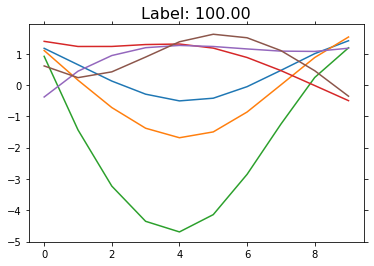

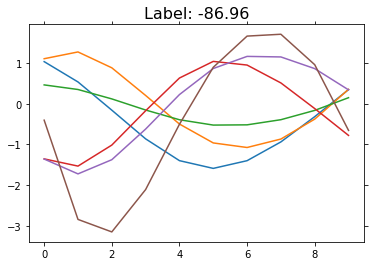

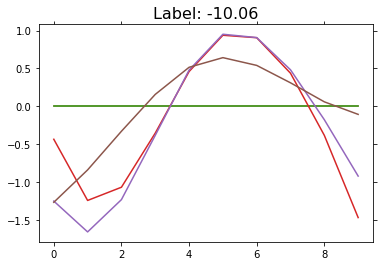

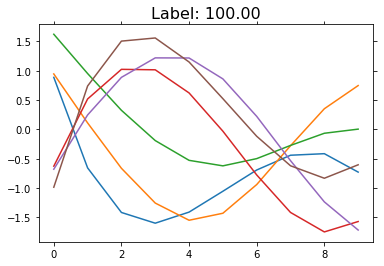

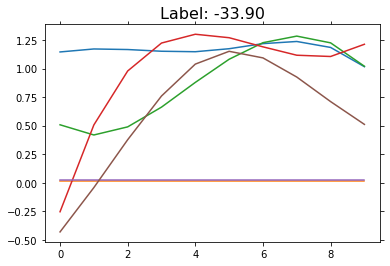

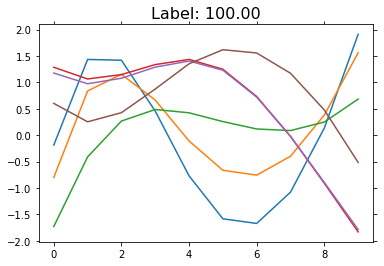

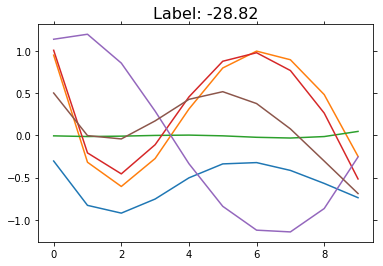

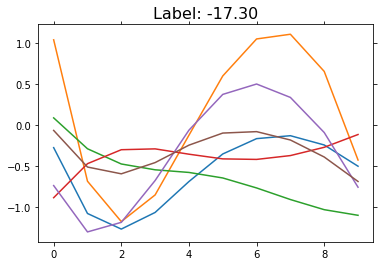

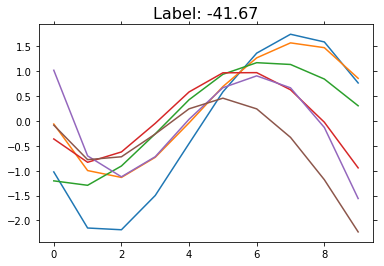

In [ ]:
dloaders.show_batch()

In [ ]:
from torchtools.models import *
from torchtools.core import *

In [ ]:
## debug
class InceptionBlock(nn.Module):
    def __init__(self,c_in,bottleneck=32,ks=40,nb_filters=32,residual=True,depth=6):

        super().__init__()

        self.residual = residual
        self.depth = depth

        #inception & residual layers
        inc_mods = []
        res_layers = []
        res = 0
        for d in range(depth):
            inc_mods.append(
                Inception(c_in if d == 0 else nb_filters * 4, bottleneck=bottleneck if d > 0 else 0,ks=ks,
                          nb_filters=nb_filters))
            if self.residual and d % 3 == 2:
                res_layers.append(shortcut(c_in if res == 0 else nb_filters * 4, nb_filters * 4))
                res += 1
            else: res_layer = res_layers.append(None)
        self.inc_mods = nn.ModuleList(inc_mods)
        self.res_layers = nn.ModuleList(res_layers)
        self.act = nn.ReLU()
        
    def forward(self, x):
        print(f'block dtype {x.dtype}')
        res = x
        for d, l in enumerate(range(self.depth)):
            x = self.inc_mods[d](x)
            if self.residual and d % 3 == 2:
                res = self.res_layers[d](res)
                x += res
                res = x
                x = self.act(x)
        return x


class InceptionTime(nn.Module):
    def __init__(self,c_in,c_out,bottleneck=32,ks=40,nb_filters=32,residual=True,depth=6):
        super().__init__()
        self.block = InceptionBlock(c_in,bottleneck=bottleneck,ks=ks,nb_filters=nb_filters,
                                    residual=residual,depth=depth)
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(nb_filters * 4, c_out)

    def forward(self, x):
        print(x.dtype)
#         x.to(torch.float)
        x = self.block(x)
#         print(x.shape)
        x = self.gap(x).squeeze(-1)
        x = self.fc(x)
        return x


class InceptionTimeSgm(nn.Module):
    '''
    add a sigmoid layer to InceptionTime to get the ouput in a certain range
    '''
    
    def __init__(self, n_in, n_out):
        super().__init__()
        self.mod = nn.Sequential(InceptionTime(n_in, n_out), Sigmoid(-1., 1.))
        
    def forward(self, x):
        x = x.float()
        print(f'InceptionTimeSgm dtype {x.dtype}')
        return self.mod(x)

In [ ]:
#export
class ResNetSgm(nn.Module):
    def __init__(self,c_in, c_out):
        super().__init__()
        nf = 64

        self.block1 = ResBlock(c_in, nf, ks=[7, 5, 3], act_fn='relu')
        self.block2 = ResBlock(nf, nf * 2, ks=[7, 5, 3], act_fn='relu')
        self.block3 = ResBlock(nf * 2, nf * 2, ks=[7, 5, 3], act_fn='relu')
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(nf * 2, c_out)
        self.sig = SigmoidRange(-1,1)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.gap(x).squeeze(-1)
        x = self.fc(x)
        return self.sig(x)

In [ ]:
#cuda
loss_fn = get_loss_fn('leaky_loss', alpha=0.5)

learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=loss_fn, metrics=unweighted_profit, wd=0.03)
# learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=F.mse_loss, metrics=unweighted_profit, wd=0.03)

In [ ]:
learn.fit_one_cycle(10, lr_max=1e-4)

epoch,train_loss,valid_loss,time
0,0.002585,-0.065326,00:19
1,-0.574114,-0.341607,00:18
2,-2.112569,-0.399976,00:18
3,-4.672544,-0.555720,00:18
4,-9.311034,-0.527695,00:18
5,-14.095984,-0.063690,00:18
6,-18.721582,-0.247219,00:18
7,-22.277803,-0.215356,00:18
8,-24.791880,-0.198753,00:18
9,-25.763275,-0.204667,00:18


InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32


In [ ]:
preds = learn.get_preds(0)

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

In [ ]:
unweighted_profit(*preds, 0)

tensor(19.0951)

In [ ]:
(preds[0]>0.99).sum()

tensor(11014)

In [ ]:
learn.loss_func(*preds)

tensor(-0.2047, requires_grad=True)

In [ ]:
weighted_profit(*preds, 0.5)

tensor(-0.2517)

In [ ]:
((preds[0].squeeze() > 0).float() * preds[1]).mean()

TensorFloat(-0.0200)

In [ ]:
((preds[0]>=-1).int() * preds[1]).mean()

TensorFloat(-2.8626)

In [ ]:
_verbose=False

In [ ]:
learn.fit_one_cycle(5, lr_max=1e-1, pct_start=0.3)

epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.271601,-0.432503,-0.141485,00:03
1,-0.294538,-0.465206,-0.149836,00:03
2,-0.313153,-0.506633,-0.202532,00:03
3,-0.333494,-0.338696,-0.170355,00:03
4,-0.344131,-0.443630,-0.141831,00:03


timestepzero
randomcrop
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 6 7 8 9]
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 5]
randomcrop
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[2 3 4 5 6]
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
[2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block

In [ ]:
x.data.shape

torch.Size([128, 6, 10])

In [ ]:
y.shape

torch.Size([128, 1])

In [ ]:
%%timeit
ToFloatTensor()(L(range(128)))

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloatTensor
ToFloa

In [ ]:
%%timeit
ToTSTensor()(x.data)

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor
ToTSTensor

In [ ]:
350*245 *1e-9

8.575000000000001e-05

In [ ]:
ToTSTensor(x.data)

RuntimeError: bool value of Tensor with more than one value is ambiguous

In [ ]:
ToTSTensor(x.)

RuntimeError: bool value of Tensor with more than one value is ambiguous